<font color="Green"><h1> **Original Kaggle Starting Code Block**</h1></font>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



/kaggle/input/learn-ai-bbc/BBC News Train.csv
/kaggle/input/learn-ai-bbc/BBC News Sample Solution.csv
/kaggle/input/learn-ai-bbc/BBC News Test.csv


<font color="Green"><h1> **EDA Section**</h1></font>

In [2]:
#import additional libraries
import matplotlib.pyplot as plt
import plotly.express as px
import itertools as itt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA, NMF
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.spatial.distance import cdist
from sklearn.manifold import TSNE
import random
from sklearn.feature_extraction.text import CountVectorizer
#import the data
train_data = pd.read_csv('/kaggle/input/learn-ai-bbc/BBC News Train.csv')
sample_solution = pd.read_csv('/kaggle/input/learn-ai-bbc/BBC News Sample Solution.csv')
test_data = pd.read_csv('/kaggle/input/learn-ai-bbc/BBC News Test.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB
None
   ArticleId                                               Text  Category
0       1833  worldcom ex-boss launches defence lawyers defe...  business
1        154  german business confidence slides german busin...  business
2       1101  bbc poll indicates economic gloom citizens in ...  business
3       1976  lifestyle  governs mobile choice  faster  bett...      tech
4        917  enron bosses in $168m payout eighteen former e...  business
         ArticleId
count  1490.000000
mean   1119.696644
std     641.826283
min       2.000000
25%     565.250000
50%    1112.500000
75%    1680.750000
max    2224.000000


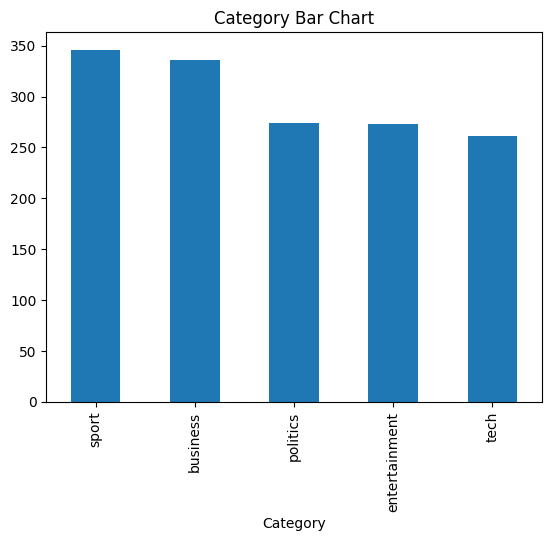

Vectorized data shape is (1490, 4510)  

        000  000m   05        10  100  100m  102  10bn   11  110  ...  \
0  0.000000   0.0  0.0  0.000000  0.0   0.0  0.0   0.0  0.0  0.0  ...   
1  0.000000   0.0  0.0  0.049454  0.0   0.0  0.0   0.0  0.0  0.0  ...   
2  0.038022   0.0  0.0  0.000000  0.0   0.0  0.0   0.0  0.0  0.0  ...   
3  0.033085   0.0  0.0  0.000000  0.0   0.0  0.0   0.0  0.0  0.0  ...   
4  0.000000   0.0  0.0  0.042796  0.0   0.0  0.0   0.0  0.0  0.0  ...   

   youngsters  youth  yuan  yugansk  yuganskneftegas  yukos  zealand  zero  \
0    0.000000    0.0   0.0      0.0              0.0    0.0      0.0   0.0   
1    0.000000    0.0   0.0      0.0              0.0    0.0      0.0   0.0   
2    0.000000    0.0   0.0      0.0              0.0    0.0      0.0   0.0   
3    0.076386    0.0   0.0      0.0              0.0    0.0      0.0   0.0   
4    0.000000    0.0   0.0      0.0              0.0    0.0      0.0   0.0   

   zone  Category  
0   0.0  business  
1   0.0  bu

/tmp/ipykernel_18/3142795673.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts.drop(['Category'], axis = 1, inplace = True)


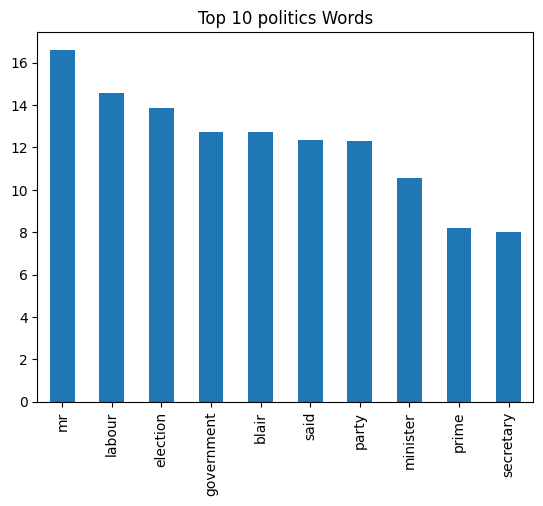

/tmp/ipykernel_18/3142795673.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts.drop(['Category'], axis = 1, inplace = True)


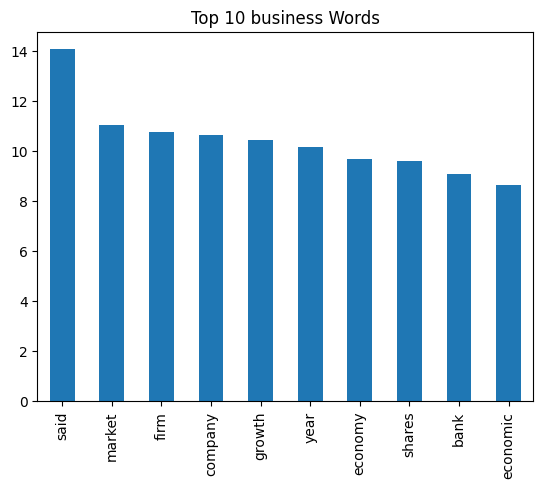

/tmp/ipykernel_18/3142795673.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts.drop(['Category'], axis = 1, inplace = True)


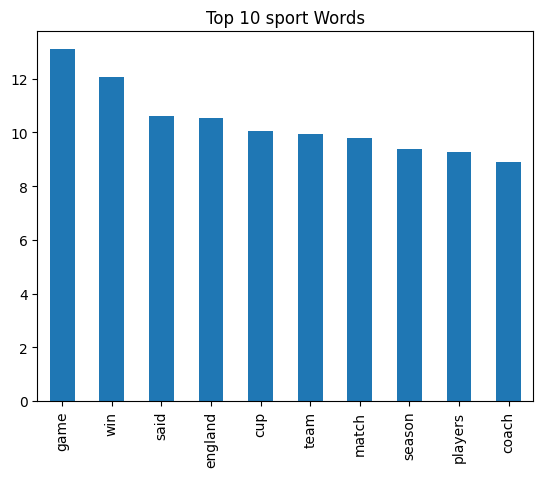

/tmp/ipykernel_18/3142795673.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts.drop(['Category'], axis = 1, inplace = True)


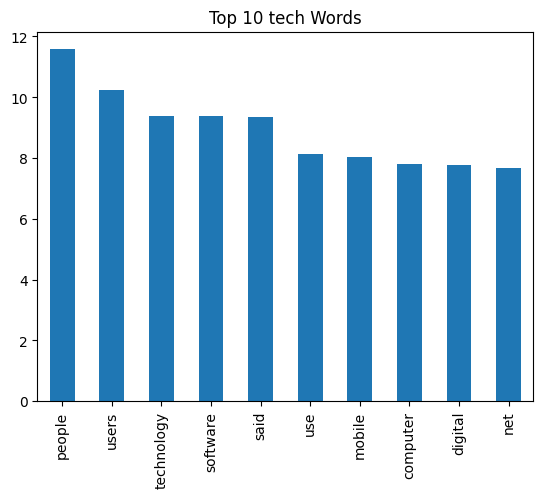

/tmp/ipykernel_18/3142795673.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts.drop(['Category'], axis = 1, inplace = True)


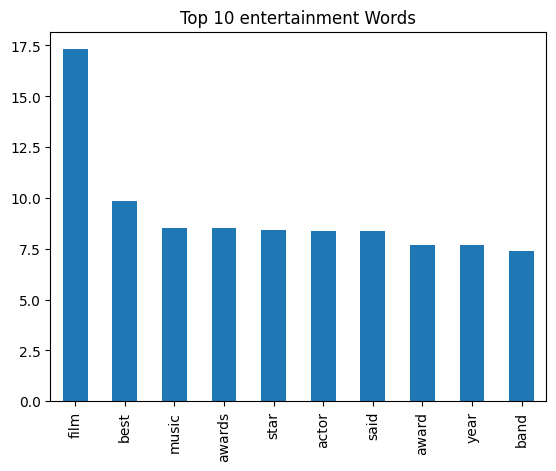

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [3]:
#EDA

#check out the raw data
print(train_data.info())
print(train_data.head())
print(train_data.describe())

cat_counts = train_data['Category'].value_counts()
cat_counts.plot(kind='bar')
plt.title('Category Bar Chart')
plt.show()

#vectorize the content data column to feature vectors using sklearn library
#we will use tfidf more in depth in the model-building phase

tfidf = TfidfVectorizer(sublinear_tf= True, min_df = 5, norm = 'l2', encoding = 'latin-1', stop_words = 'english', max_features = 4510)
vectorized = pd.DataFrame(tfidf.fit_transform(train_data['Text']).toarray(), columns = tfidf.get_feature_names_out())
labels = train_data['Category']
vectorized_df_w_labels = vectorized.assign(Category = labels)

#check out shape of our data
print('Vectorized data shape is', vectorized.shape, ' \n')
print(vectorized_df_w_labels.head())

#plot histograms of top 10 words in each category

for category in set(labels):
    
    counts = vectorized_df_w_labels[vectorized_df_w_labels['Category'] == category]
    counts.drop(['Category'], axis = 1, inplace = True)
    sums = counts.sum()
    ten_largest = sums.nlargest(n = 10, keep = 'all')

    plt.figure()
    ten_largest.plot(kind='bar')
    plt.title('Top 10 ' + category + ' Words')
    plt.show()

#visualize PCA components in 2-D
X = tfidf.fit_transform(train_data['Text']).toarray()
X_embedded = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=3).fit_transform(X)
X_embedded.shape

fig = px.scatter(X_embedded, x = 0, y = 1, color = labels)
fig.show()

<font color="Green"><h1> **Unsupervised Model Building and Training Section**</h1></font>

In [4]:
#build our intial model
NMF_model = NMF(n_components = 5, init = 'nndsvd')
W = NMF_model.fit_transform(vectorized)
H = NMF_model.components_

In [5]:
def get_word_dict(n, H):
    
    #take in the topc-document matrix produced by sklearn's NMF and the number of labels
    #retrun a dictionary with NMF models as categories and top n words in each category as corrseponding values
    
    assert(type(n) == int)
    
    n_words = n
    n_cat = H.shape[0]
    word_dict = {}

    for category in range(n_cat):
        
        output = []
        temp = np.argsort(H[category])
        temp = temp[(len(temp) - n_words):len(temp)]
        temp = np.flip(temp)
        
        #temp is now the sorted list of the indexes of the top n words in the category
        
        for word_index in temp:
            output.append(vectorized.columns[word_index])

        word_dict[category] = output

    return word_dict

In [6]:
#create a function which predicts article category:

def predict_article_categories(data, labeled_dict):
    
    #predict a label for each article of the test dataset
    prediction = []

    for article in range(len(data)):
        article_texts = data['Text']
        ind_pred = get_individual_prediction(article_texts[article], labeled_dict)
        prediction.append((data['ArticleId'][article], ind_pred))
    
    return prediction

def get_individual_prediction(article_text, labeled_dict):
    hits = 0
    #iterate through the article texts and count the times the category word appears in teh articel for each category
    ind_preds = []
    for category in labeled_dict.keys():
        category_words = labeled_dict[category]
        hits = 0
        current_pred = [None, 0]
        
        for category_word in category_words:
            if(category_word in article_text):
                hits += 1
        
        ind_preds.append([category, hits])
    
    #loop through the possibilities to deal with ties
    selector = 0
    final_pred = None
    for i in range(len(ind_preds)):
        if ind_preds[i][1] > selector:
            final_pred = ind_preds[i][0]
            selector = ind_preds[i][1]
        elif ind_preds[i][1] == selector:
            final_pred = np.random.choice([ind_preds[i][0] , final_pred])
        else:
            continue
            
    return final_pred

In [7]:
word_dict = get_word_dict(20, H)

#in a true unsuperivsed approach we would first test the model and see if it performs well enough to use
#we would then give these categories names instead of 0,1,2,3,4 by working with Subject Matter Experts/Domain Experts
#However, since we have the benefit of knowing what the categories are, we can just assign them first to make for easier testing:

labeled_dict = {}
labeled_dict['tech'] = word_dict[0]
labeled_dict['sport'] = word_dict[1]
labeled_dict['politics'] = word_dict[2]
labeled_dict['entertainment'] = word_dict[3]  
labeled_dict['business'] = word_dict[4]

print(labeled_dict)

{'tech': ['people', 'users', 'technology', 'mobile', 'digital', 'software', 'use', 'phone', 'music', 'said', 'net', 'microsoft', 'service', 'online', 'internet', 'computer', 'phones', 'video', 'new', 'information'], 'sport': ['game', 'win', 'england', 'cup', 'team', 'play', 'match', 'players', 'season', 'time', 'said', 'coach', 'final', 'injury', 'ireland', 'half', 'world', 'club', 'second', 'france'], 'politics': ['mr', 'labour', 'election', 'blair', 'party', 'government', 'minister', 'said', 'prime', 'tory', 'tories', 'brown', 'howard', 'leader', 'tony', 'chancellor', 'general', 'public', 'secretary', 'lib'], 'entertainment': ['film', 'best', 'awards', 'actor', 'award', 'oscar', 'star', 'actress', 'films', 'director', 'won', 'comedy', 'nominated', 'year', 'stars', 'nominations', 'movie', 'ceremony', 'aviator', 'hollywood'], 'business': ['growth', 'said', 'market', 'economy', 'year', '2004', 'economic', 'shares', 'bank', 'company', 'firm', 'sales', 'prices', 'analysts', 'oil', 'rise',

In [8]:
submission = predict_article_categories(test_data, labeled_dict)

In [9]:
#export
df = pd.DataFrame(submission, columns =['ArticleId', 'Category'])
df.to_csv('unsupervised_output.csv',index=False)

<font color="Green"><h1> **Rerun with different number of prediction words**</h1></font>

In [10]:
#vary the number of words used to predict and submit to Kaggle. Chose n = 1, 5, 10, 15, 20

for n in range(20):
    word_dict = get_word_dict(n, H)
    labeled_dict = {}
    labeled_dict['tech'] = word_dict[0]
    labeled_dict['sport'] = word_dict[1]
    labeled_dict['politics'] = word_dict[2]
    labeled_dict['entertainment'] = word_dict[3]  
    labeled_dict['business'] = word_dict[4]
    submission = predict_article_categories(test_data, labeled_dict)
    
    #export
    df_loop = pd.DataFrame(submission, columns =['ArticleId', 'Category'])
    df_loop.to_csv('unsupervised_output' + str(n) + '.csv',index=False)

<font color="Green"><h1> **Supervised Model Building and Training Section**</h1></font>

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [12]:
#vecotirze test_data
tfidf_test = TfidfVectorizer(sublinear_tf= True, min_df = 5, norm = 'l2', encoding = 'latin-1', stop_words = 'english', max_features = 4510)
vectorized_test = tfidf.fit_transform(test_data['Text']).toarray()
#vectorized_df_w_labels = vectorized.assign(Category = labels)

RFC_model = RandomForestClassifier()
RFC_model.fit(vectorized, vectorized_df_w_labels['Category'])
y_pred = RFC_model.predict(vectorized_test)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [13]:
#export RFC model
df2 = pd.DataFrame({'ArticleId' :test_data['ArticleId'], 'Category' : y_pred})
df.to_csv('supervised_outputRFC.csv',index = False)

In [14]:
#naive bayes seems to a be a popular model choice for NLP problems

MNB_model = MultinomialNB()
MNB_model.fit(vectorized, vectorized_df_w_labels['Category'])
y_pred_MNB = MNB_model.predict(vectorized)


In [15]:
#export MNB model
df3 = pd.DataFrame({'ArticleId' :test_data['ArticleId'], 'Category' : y_pred})
df3.to_csv('supervised_outputMNB.csv',index = False)

<font color="Green"><h1> **Supervised vs. Unsupervised discussion**</h1></font>

Supervised methods generally tend to be more data effecient, however are more prone to overfitting the data as you increase the data size and there is a risk of underfitting data as well vs. unsupervised methods require more data to achieve usable results but overfitting is less of a problem assuming the problem definion is a truly unsupervised approach. From a statistical theory perspective this makes sense as usupervised models are not trained with labels in the model so there is nothing to really overfit on, per se.